# **Classifiers**

***Linear Models:***

- **Logistic Regression:** Predicts the probability of a binary outcome (0 or 1).
- ***Support Vector Machines (SVMs):*** Find the optimal hyperplane to separate classes.

***Tree-Based Models:***

- **Decision Trees:** Build a tree-like model of decisions and outcomes.
- **Random Forests:** Ensemble of multiple decision trees for improved accuracy.

- **Gradient Boosting:** Sequentially builds trees, each correcting errors of the previous one.

***Probabilistic Models:***

- **Naive Bayes:** Calculates probabilities based on feature independence assumption.

***Neural Networks:***

- **Multilayer Perceptron (MLP):** A basic type of neural network with multiple layers.
- **Convolutional Neural Networks (CNNs):** Specialized for image data.
- **Recurrent Neural Networks (RNNs):** Designed for sequential data like text or time series.

- **Supervised Machine Learning Algorithms**
- **Binary Classifiers**
-- Ex: spam or not Spam
-- Covid +ve or -ve

- **Multi - Class Classifiers**
-- Digit Recognition
-- type of animal in an image



## **Logistic Regression**
- only with the linerly separable data

Logistic regression is a statistical model used for binary classification problems, where the outcome is either one of two possibilities (like "yes" or "no", "true" or "false"). It predicts the probability of the outcome based on input features.

How it works:

Input: The model takes in features (e.g., age, income) of a data point.
Linear Combination: It calculates a weighted sum of these features.
Sigmoid Function: Applies the sigmoid function to the weighted sum to get a probability between 0 and 1.
Threshold: A threshold (usually 0.5) is used to decide the final classification (0 or 1).
Example:

Let's say you want to predict whether a customer will click on an ad based on their age and income. You have a dataset with historical data:


Age	Income	Clicked

25	50000	1

30	70000	0

40	100000	1

You can train a logistic regression model on this data. The model will learn weights for age and income, and when you give it new data (e.g., age=35, income=80000), it will output a probability of clicking the ad.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Evaluate the model (you'll need metrics like accuracy, precision, etc.)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1_score = f1_score(y_test, predictions)

print("Accuracy:", accuracy)
print("Precision:", precision)

print("Recall: ", recall)
print("F1 Score", f1_score)

Accuracy: 0.9736842105263158
Precision: 0.9722222222222222
Recall:  0.9859154929577465
F1 Score 0.979020979020979


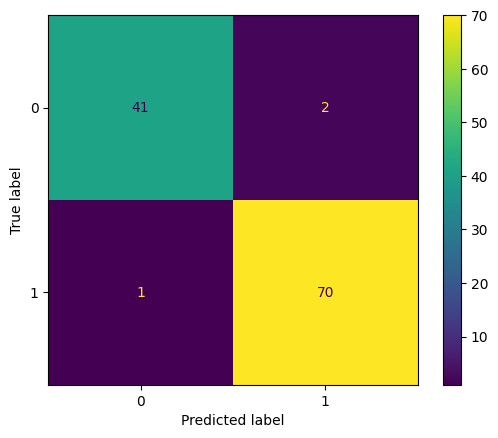

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the breast cancer dataset
# ... (rest of the code from the previous response)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predictions)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_blobs
from ipywidgets import interact, IntSlider

# Generate sample data
X, y = make_blobs(n_samples=100, centers=2, random_state=0)

# Initialize the model
clf = LogisticRegression()

def plot_decision_boundary(epoch):
    # We'll simulate epochs by adding more data points each time
    n_samples_to_use = (epoch + 1) * 10
    X_subset = X[:n_samples_to_use]
    y_subset = y[:n_samples_to_use]

    clf.fit(X_subset, y_subset)

    # Plot the data points
    plt.scatter(X_subset[:, 0], X_subset[:, 1], c=y_subset, cmap=plt.cm.Paired)

    # Plot the decision boundary
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z, levels=[0], alpha=0.5, colors='k')

    plt.title(f"Epoch {epoch+1}")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Create an interactive slider for epochs
interact(plot_decision_boundary, epoch=IntSlider(min=0, max=9, step=1, value=0))

interactive(children=(IntSlider(value=0, description='epoch', max=9), Output()), _dom_classes=('widget-interac…

<function __main__.plot_decision_boundary(epoch)>

## Support Vector Machines

Support Vector Machines are supervised learning models used for classification and regression tasks. In essence, SVMs try to find the optimal hyperplane (a decision boundary) that best separates different classes in the feature space. This hyperplane maximizes the margin, which is the distance between the hyperplane and the closest data points of each class (called support vectors)

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target (species of iris)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier (using a linear kernel for this example)
clf = SVC(kernel='linear')

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


***Second Dataset***

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,  precision_score, recall_score, f1_score

# Load the Wine Quality dataset
wine = datasets.load_wine()
X = wine.data  # Features (alcohol, malic acid, ash, alcalinity of ash, ...)
y = wine.target  # Target (quality rating)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create    an SVM classifier with a non-linear kernel (RBF)
clf = SVC(kernel='rbf', gamma='scale') #Radial Basis Function - a non linear fn

# Train the model on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

# Evaluate the model's    performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:",  f1)

Accuracy: 0.7592592592592593
Precision: 0.7537037037037037
Recall: 0.7592592592592593
F1 Score: 0.7234835454649696
